# ....................................................Project....................................................

In [2]:
import numpy as np        
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category = UserWarning)

%matplotlib inline

pd.set_option('display.max_rows', 15)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv('C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/phone_data_proje.csv', parse_dates = True)

#creating a copy for modelling later
data = df.copy()

df

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2200,2,16.0,120.000
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.000
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.000
4,P10,Huawei,Android 7.0,3200,4,32.0,420.000
...,...,...,...,...,...,...,...
1506,vivo Y77t,Vivo,Android 13,5000,8,256.0,170.000
1507,11x,Realme,Android 13,5000,8,128.0,182.880
1508,GT5,Realme,Android 13,5240,16,256.0,380.000
1509,GT5 240W,Realme,Android 13,4600,24,1.0,470.000


# Show the statistical info

In [140]:
df.describe()

,battery(MH),ram(GB),storage(GB),price(USD $)
count,1511.000000,1511.000000,1510.000000,1511.000000
mean,4390.718729,6.686300,109.277483,337.752957
std,784.050926,2.700663,74.420584,266.804037
min,1821.000000,1.000000,1.000000,40.000000
25%,4000.000000,4.000000,64.000000,179.995000
50%,4500.000000,8.000000,128.000000,260.000000
75%,5000.000000,8.000000,128.000000,400.000000
max,7250.000000,24.000000,512.000000,2300.000000


In [105]:
df.shape


(1511, 7)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   phone_name    1511 non-null   object 
 1   brand         1511 non-null   object 
 2   os            1511 non-null   object 
 3   battery(MH)   1511 non-null   int64  
 4   ram(GB)       1511 non-null   int64  
 5   storage(GB)   1510 non-null   float64
 6   price(USD $)  1511 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 82.8+ KB


In [107]:
df.columns

Index(['phone_name', 'brand', 'os', 'battery(MH)', 'ram(GB)', 'storage(GB)',
       'price(USD $)'],
      dtype='object')

In [108]:
df.isnull().sum()

phone_name      0
brand           0
os              0
battery(MH)     0
ram(GB)         0
storage(GB)     1
price(USD $)    0
dtype: int64

# Fill the missing values using mean.

In [109]:
a=df['storage(GB)'].mean()
a

np.float64(109.2774834437086)

In [110]:
df['storage(GB)']=df['storage(GB)'].fillna(a)
df

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2200,2,16.0,120.000
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.000
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.000
4,P10,Huawei,Android 7.0,3200,4,32.0,420.000
...,...,...,...,...,...,...,...
1506,vivo Y77t,Vivo,Android 13,5000,8,256.0,170.000
1507,11x,Realme,Android 13,5000,8,128.0,182.880
1508,GT5,Realme,Android 13,5240,16,256.0,380.000
1509,GT5 240W,Realme,Android 13,4600,24,1.0,470.000


In [111]:
df.isnull().sum()

phone_name      0
brand           0
os              0
battery(MH)     0
ram(GB)         0
storage(GB)     0
price(USD $)    0
dtype: int64

# checking the outliers

<Axes: >

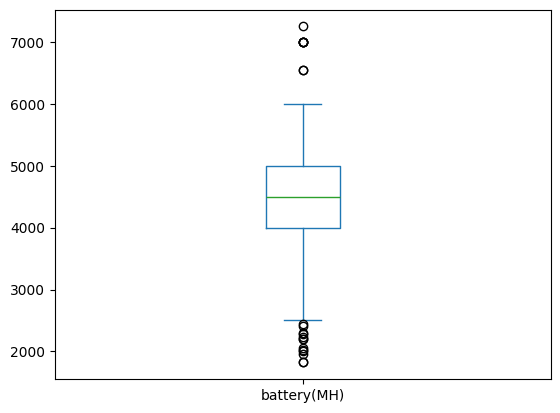

In [115]:
df["battery(MH)"].plot(kind='box')

# Replace the outliers using IQR method

In [116]:
q1=df['battery(MH)'].quantile(0.25)
q3=df['battery(MH)'].quantile(0.75)
iqr=q3-q1

In [114]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [117]:
bat_arr=df['battery(MH)']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

0       2200
5       2300
19      2500
27      2200
28      2050
        ... 
947     2438
1084    6550
1094    2018
1447    7000
1491    6550
Name: battery(MH), Length: 26, dtype: int64


In [118]:
batt_arr=df['battery(MH)']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

In [119]:
for i in df['battery(MH)']:
    if i <lower_bound:
        df['battery(MH)']=df['battery(MH)'].replace(i,lower_cap)
    elif i >upper_bound:
        df['battery(MH)']=df['battery(MH)'].replace(i,upper_cap)

<Axes: >

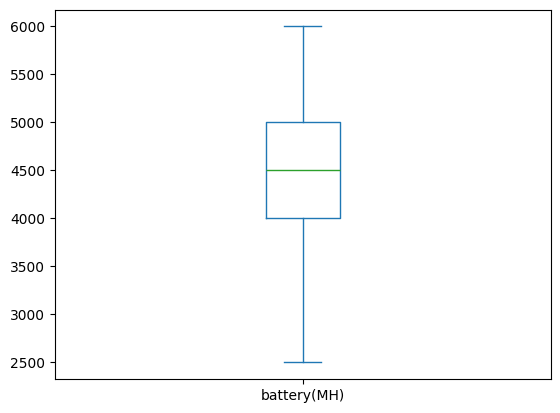

In [120]:
df["battery(MH)"].plot(kind='box')

In [121]:
df.head()

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2500,2,16.0,120.0
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.0
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.0
4,P10,Huawei,Android 7.0,3200,4,32.0,420.0


In [122]:
df

,phone_name,brand,os,battery(MH),ram(GB),storage(GB),price(USD $)
0,Y6II Compact,Huawei,Android 5.1,2500,2,16.0,120.000
1,K20 plus,LG,Android 7.0,2700,2,16.0,100.000
2,P8 Lite (2017),Huawei,Android 7.0,3000,4,16.0,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,4100,4,32.0,150.000
4,P10,Huawei,Android 7.0,3200,4,32.0,420.000
...,...,...,...,...,...,...,...
1506,vivo Y77t,Vivo,Android 13,5000,8,256.0,170.000
1507,11x,Realme,Android 13,5000,8,128.0,182.880
1508,GT5,Realme,Android 13,5240,16,256.0,380.000
1509,GT5 240W,Realme,Android 13,4600,24,1.0,470.000


To convert a string to an integer in Python for Linear Regression, you can use the following methods:

1. Label Encoding: Use LabelEncoder from sklearn.preprocessing to convert categorical strings to numerical integers.


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['column_name'] = le.fit_transform(data['column_name'])


2. One-Hot Encoding: Use OneHotEncoder or get_dummies from pandas to convert categorical strings to numerical integers.


import pandas as pd

data = pd.get_dummies(data, columns=['column_name'])


3. Manual Mapping: Create a dictionary to map string values to integers.


mapping = {'string_value1': 1, 'string_value2': 2}
data['column_name'] = data['column_name'].map(mapping)


After converting the string to an integer, you can proceed with Linear Regression.

Example:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assume 'data' is your DataFrame
data['column_name'] = pd.to_numeric(data['column_name'], errors='coerce')

# or use LabelEncoder
le = LabelEncoder()
data['column_name'] = le.fit_transform(data['column_name'])

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


Choose the method that best suits your data and problem.

# Converting the string to integer values.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['phone_name'] = le.fit_transform(df['phone_name'])
df['brand'] = le.fit_transform(df['brand'])
df['os'] = le.fit_transform(df['os'])

In [4]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['phone_name', 'brand', 'os', 'battery(MH)', 'ram(GB)', 'storage(GB)',
       'price(USD $)'],
      dtype='object')


In [5]:
import pandas as pd

data = pd.get_dummies(data, columns=['phone_name'])
data = pd.get_dummies(data, columns=['brand'])
data = pd.get_dummies(data, columns=['os'])

In [6]:
df['phone_name'] = pd.to_numeric(df['phone_name'], errors='coerce')
df['brand'] = pd.to_numeric(df['brand'])
df['os'] = pd.to_numeric(df['os'])

# Splitting Data

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X = df.drop('price(USD $)',axis=1)
y = data['price(USD $)']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Edit the text

In [11]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Ensure y_test has the same index as X_test
y_pred = model.predict(X_test)



In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'constant'
X_test_imputed = imputer.fit_transform(X_test)
y_pred = model.predict(X_test_imputed)


In [13]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [14]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Predicting the model

In [15]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [19]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) :",rmse)
print("R Squared is :",r2)

Mean Squared Error (MSE): 69753.03029253021
Root Mean Squared Error (RMSE) : 264.10798983092167
R Squared is : 0.24456864114396626
